## Decision Tree and Random Forest Exercise project with Loan_Data

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# read csv 
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [13]:
for i in data['purpose'].unique():
    print(i)

debt_consolidation
credit_card
all_other
home_improvement
small_business
major_purchase
educational


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis

#### FICO score for Credit.policy =1 vs credit.policy=0 

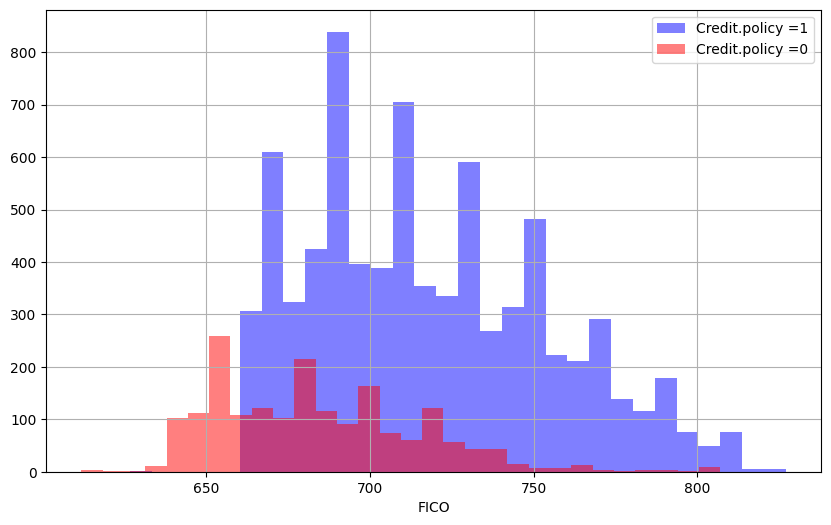

In [18]:


plt.figure(figsize=(10,6))

data[data['credit.policy']==1]['fico'].hist(alpha =0.5, label = 'Credit.policy =1', bins =30,color = 'b')
data[data['credit.policy']==0]['fico'].hist(alpha =0.5, label = 'Credit.policy =0', bins =30,color = 'r')
plt.legend()
plt.xlabel('FICO')
plt.show()

#### FICO graph for not.fully.paid =0 and not.fully.paid= 1

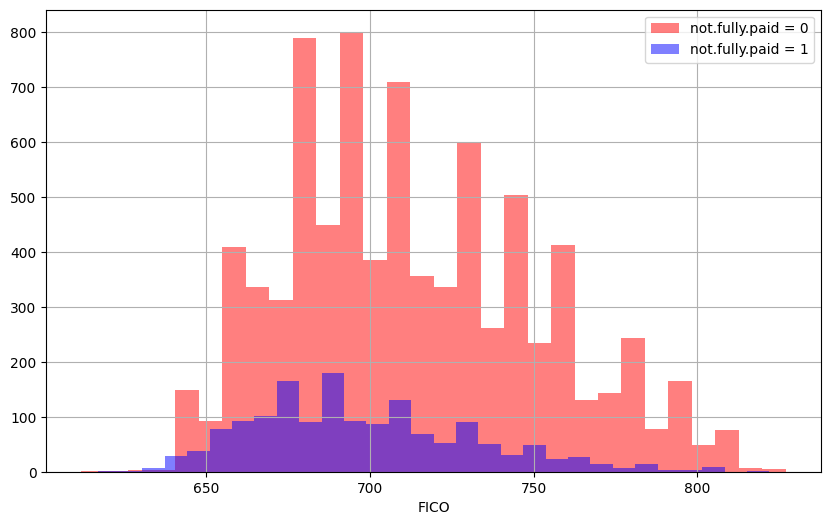

In [26]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5, bins =30,color ='r',label='not.fully.paid = 0')
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=30 ,color='b', label ='not.fully.paid = 1')
plt.xlabel('FICO')
plt.legend()
plt.show()

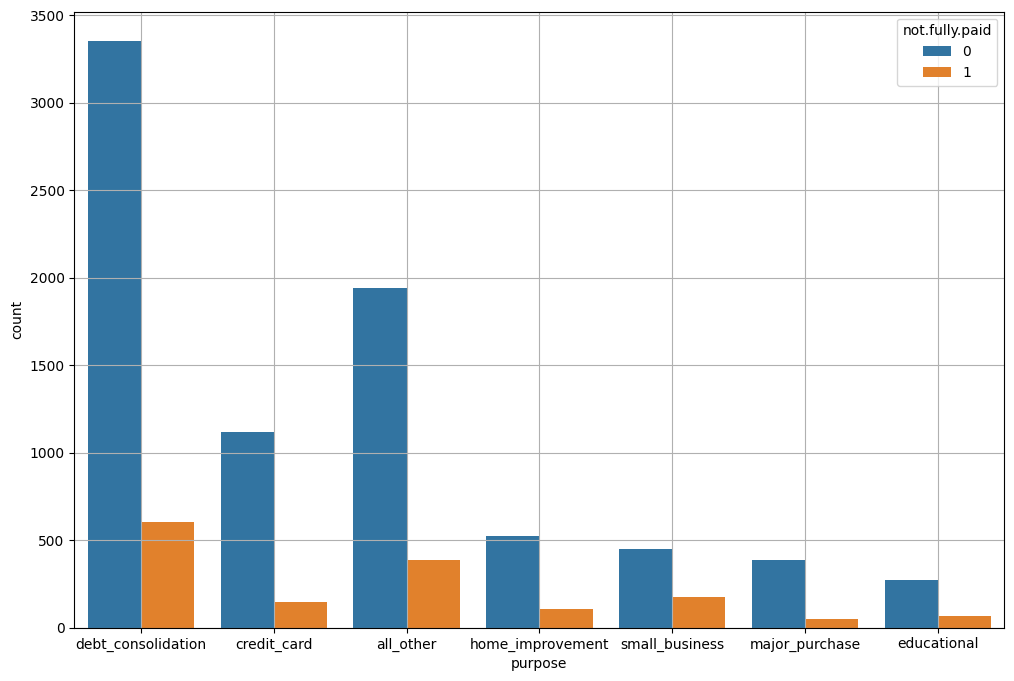

In [30]:
plt.figure(figsize= (12,8))
sns.countplot(x='purpose',data= data, hue ='not.fully.paid')
plt.grid(True)

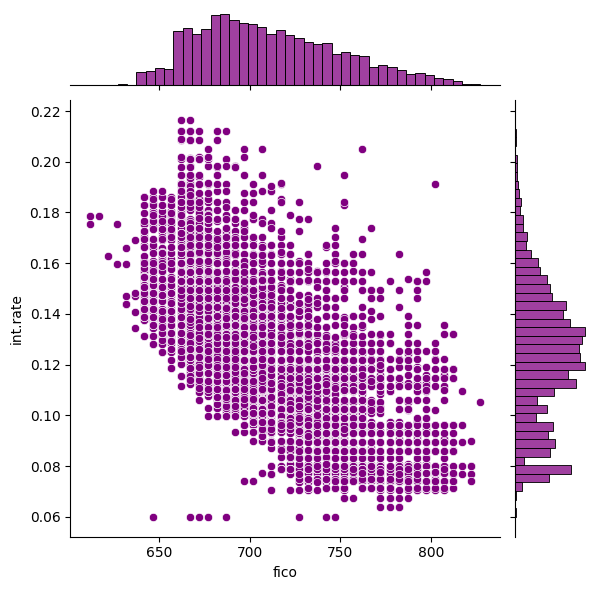

In [48]:
# joint plot between fico score and interest rate

sns.jointplot(x='fico', y='int.rate', data= data, color = 'purple')

In [49]:
# lm plot between interest rate and fico score 

/home/sudeep/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1300x700 with 0 Axes>

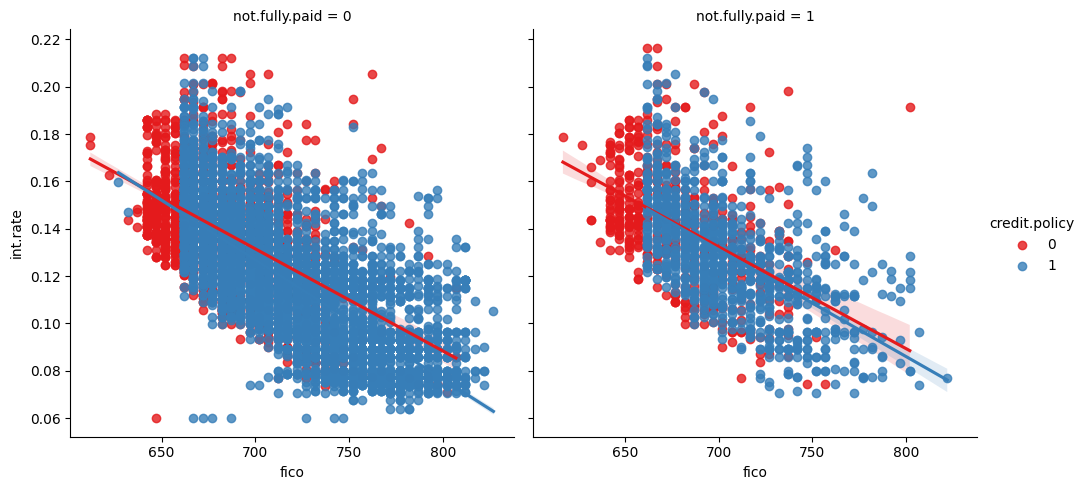

In [53]:
plt.figure(figsize=(13,7))
sns.lmplot(x='fico', y='int.rate', data= data , col='not.fully.paid',hue= 'credit.policy', palette='Set1')

### setting up the data

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [56]:
# using dummie variable to convert 'purpose ' column into binary form which is directly understandable by machine

In [59]:
ctgl_feat = ['purpose']

In [60]:
final_data = pd.get_dummies(data, columns=ctgl_feat, drop_first=True)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,False,False,False,False,False,False
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False,True,False,False,False,False
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False,False,False,True,False,False


In [61]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### train_test_split 

In [62]:
X= final_data.drop('not.fully.paid',axis=1 )

In [63]:
y = final_data['not.fully.paid']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtc = DecisionTreeClassifier()

In [68]:
dtc.fit(X_train ,y_train)

DecisionTreeClassifier()

In [69]:
predictions = dtc.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print('Classification report: \n', classification_report(y_test, predictions))
print('Confusion matrix :\n', confusion_matrix(y_test, predictions))

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.20      0.22      0.21       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.74      0.74      0.74      3161

Confusion matrix :
 [[2219  431]
 [ 401  110]]


## Using tree forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc= RandomForestClassifier(n_estimators=700)


In [88]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=700)

In [84]:
pred = rfc.predict(X_test)

In [89]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
print("Classification report :\n ", classification_report(y_test, pred))
print('Confusion matrix : \n', confusion_matrix(y_test,pred))

Classification report :
                precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.38      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.61      0.51      0.47      3161
weighted avg       0.77      0.84      0.77      3161

Confusion matrix : 
 [[2637   13]
 [ 503    8]]
